# Practical on SVMs

### Done by Xueyun WENG with some codes from scikit-learn documentation and help from chatGPT

## 1) An elementary SVM

### 1.2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
plt.style.use("ggplot")
from sklearn import svm

[0.49975586 0.49975586]


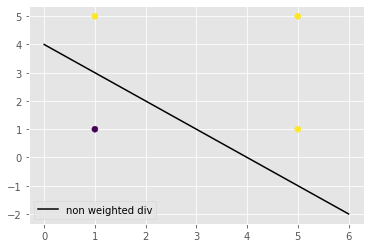

In [2]:
X = np.array([[1, 1], [1, 5], [5, 1], [5, 5]])
y = [-1,1,1,1]
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

w = clf.coef_[0]
print(w)
a =-w[0] / w[1]
xx = np.linspace(0,6)

#we have ax+by+c=0 and in the following lines, convert this into y = ax+b
yy = a * xx- clf.intercept_[0] / w[1]

fig, ax = plt.subplots()
ax.plot(xx, yy, "k-", label="non weighted div")
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.legend()
plt.show()

In [3]:
clf.support_vectors_ 

array([[1., 1.],
       [1., 5.],
       [5., 1.]])

## 2) Iris

In [4]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [5]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [7]:
# Extract some useful information
num_classes = len(iris.target_names)
classes_labels = sorted(set(iris.target))

In [8]:
num_classes, classes_labels

(3, [0, 1, 2])

In [9]:
# Initialize classifier
clf = svm.SVC()

In [10]:
# Il y a 150 samples et on en veut 100 dans le train set donc test_size = 100/150

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100/150, random_state=42)

In [12]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### The precision and recall of each class

In [13]:
# According to scikit learn documentation, the precision-recall curve does not support the multilabel setting. 
# However, one can decide how to handle this case.
# We use OneVsRestClassifier for multi-label prediction

In [14]:
#the following code is from : 
#https://scikit-learn.org/1.5/auto_examples/model_selection/plot_precision_recall.html#in-multi-label-settings

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

In [16]:
from sklearn.multiclass import OneVsRestClassifier

classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), svm.SVC())
)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

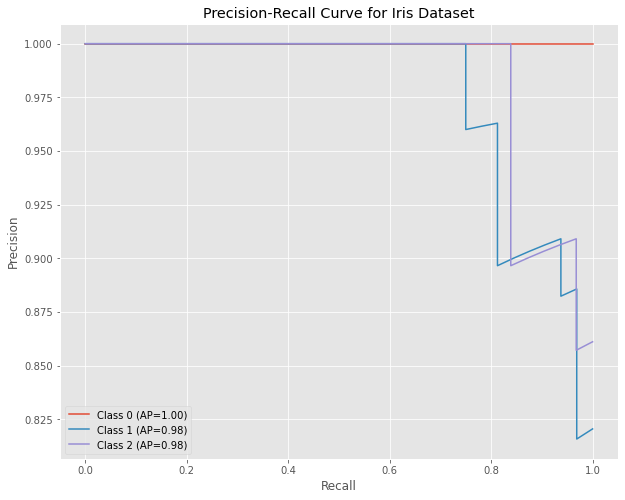

In [17]:
#Plot precision-recall for each class
plt.figure(figsize=(10, 8))
for i in range(3):
    precision, recall, _ = precision_recall_curve(y_test == i, y_score[:, i])
    average_precision = average_precision_score(y_test == i, y_score[:, i])
    
    plt.plot(recall, precision, label=f'Class {i} (AP={average_precision:.2f})')

    
plt.title('Precision-Recall Curve for Iris Dataset')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
# Comments : 
# - Class 0 gets excellent results both for precision and recall (all relevant samples are returned and all are correct!)
# - Classes 1 and 2 have the precision decresing while the recall is increasing but the precision is still good (more than 0.825)

### Average precision and recall using KFlod class (n=10)

In [21]:
#Using KFold 
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)

#define the pipeline
clf = svm.SVC()

# Containers to collect precision and recall for each fold and each class
precision_scores = {0: [], 1: [], 2: []}
recall_scores = {0: [], 1: [], 2: []}

In [22]:
from sklearn.metrics import precision_score, recall_score

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = clf.predict(X_test)
    
    # Calculate precision and recall for each class
    for cls in [0, 1, 2]:
        precision = precision_score(y_test, y_pred, labels=[cls], average='micro', zero_division=0)
        recall = recall_score(y_test, y_pred, labels=[cls], average='micro', zero_division=0)
        precision_scores[cls].append(precision)
        recall_scores[cls].append(recall)


for cls in [0, 1, 2]:
    avg_precision = np.mean(precision_scores[cls])
    avg_recall = np.mean(recall_scores[cls])
    print(f"Class {cls} - Average Precision: {avg_precision:.2f}, Average Recall: {avg_recall:.2f}")


Class 0 - Average Precision: 1.00, Average Recall: 1.00
Class 1 - Average Precision: 0.97, Average Recall: 0.94
Class 2 - Average Precision: 0.95, Average Recall: 0.97


## Polynomial kernel

In [23]:
# Now, let's try the polynomial kernel to see how performance can be improved

In [43]:
degree = 5
gamma ='scale'
coef0 = 0.5

svm_poly_clf = svm.SVC(kernel='poly', degree=degree, gamma=gamma, coef0=coef0)

In [44]:
# Containers to collect precision and recall for each fold and each class 
precision_scores = {0: [], 1: [], 2: []}
recall_scores = {0: [], 1: [], 2: []}

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    svm_poly_clf.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = svm_poly_clf.predict(X_test)
    
    # Calculate precision and recall for each class
    for cls in [0, 1, 2]:
        precision = precision_score(y_test, y_pred, labels=[cls], average='micro', zero_division=0)
        recall = recall_score(y_test, y_pred, labels=[cls], average='micro', zero_division=0)
        precision_scores[cls].append(precision)
        recall_scores[cls].append(recall)

# Print average precision and recall for each class
for cls in [0, 1, 2]:
    avg_precision = np.mean(precision_scores[cls])
    avg_recall = np.mean(recall_scores[cls])
    print(f"Class {cls} - Average Precision: {avg_precision:.2f}, Average Recall: {avg_recall:.2f}")

Class 0 - Average Precision: 1.00, Average Recall: 1.00
Class 1 - Average Precision: 0.97, Average Recall: 0.93
Class 2 - Average Precision: 0.95, Average Recall: 0.97


In [38]:
'''
Using :
    degree = 3
    gamma ='scale'
    coef0 = 1
Class 0 - Average Precision: 1.00, Average Recall: 1.00
Class 1 - Average Precision: 0.99, Average Recall: 0.90
Class 2 - Average Precision: 0.91, Average Recall: 0.98
'''

"\nUsing :\n    degree = 3\n    gamma ='scale'\n    coef0 = 1\nClass 0 - Average Precision: 1.00, Average Recall: 1.00\nClass 1 - Average Precision: 0.99, Average Recall: 0.90\nClass 2 - Average Precision: 0.91, Average Recall: 0.98\n"

In [ ]:
'''
Using :
degree = 3
gamma ='scale'
coef0 = 0.5
Class 0 - Average Precision: 1.00, Average Recall: 1.00
Class 1 - Average Precision: 1.00, Average Recall: 0.90
Class 2 - Average Precision: 0.91, Average Recall: 1.00
'''

In [ ]:
'''
Using :
degree = 5
gamma ='scale'
coef0 = 0.5
Class 0 - Average Precision: 1.00, Average Recall: 1.00
Class 1 - Average Precision: 0.97, Average Recall: 0.93
Class 2 - Average Precision: 0.95, Average Recall: 0.97
'''

In [45]:
# The precision and recall certainly depend on parameters values. One should think about the performance theur want.
# Does precision dwarf recall or the opposite?

## 3) Chronic Kidney Disease

### 3.1) Data preparation

In [93]:
from scipy.io import arff
import pandas as pd

In [120]:
data, meta = arff.loadarff('./chronic_kidney_disease/chronic_kidney_disease_full.arff')

ckd = pd.DataFrame(data)

In [121]:
ckd.shape

(400, 25)

In [122]:
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,b'1.020',b'1',b'0',b'?',b'normal',b'notpresent',b'notpresent',121.0,...,44.0,7800.0,5.2,b'yes',b'yes',b'no',b'good',b'no',b'no',b'ckd'
1,7.0,50.0,b'1.020',b'4',b'0',b'?',b'normal',b'notpresent',b'notpresent',NaN,...,38.0,6000.0,NaN,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
2,62.0,80.0,b'1.010',b'2',b'3',b'normal',b'normal',b'notpresent',b'notpresent',423.0,...,31.0,7500.0,NaN,b'no',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,...,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
4,51.0,80.0,b'1.010',b'2',b'0',b'normal',b'normal',b'notpresent',b'notpresent',106.0,...,35.0,7300.0,4.6,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'


### Clean up the data : 

In [123]:
#If a column in the DataFrame contains byte strings (e.g., b'some_value'), it has to be decoded
ckd = ckd.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [124]:
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,?,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,?,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [125]:
#Replace values such as ?, "None", "N/A" with np.nan
ckd.replace(['?', 'None', 'N/A', 'NaT', ''], np.nan, inplace=True)

In [128]:
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [129]:
print(ckd.dtypes)

age      float64
bp       float64
sg        object
al        object
su        object
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object


In [ ]:
# Convert multiple columns to numeric
# some colums need to be cnverted into numerical values --> in our dataset, there is no need

In [ ]:
#Convert categorical features to corresponding data type: pandas.DataFrame.astype.
# target : every colum that is Object-type

In [130]:
ckd = ckd.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)

In [131]:
print(ckd.dtypes)

age       float64
bp        float64
sg       category
al       category
su       category
rbc      category
pc       category
pcc      category
ba       category
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn      category
dm       category
cad      category
appet    category
pe       category
ane      category
class    category
dtype: object


In [133]:
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [134]:
# We store all the rows with no np.nan in a new dataframe : ckd_clean

In [135]:
ckd_clean = ckd.dropna()

In [136]:
ckd_clean.shape

(158, 25)

In [137]:
# For missing NUMERIC VALUES rows, replace the cell with the feature average: pandas.DataFrame.fillna

# 1: Calculate the mean of numeric columns
mean_values = ckd.mean(numeric_only=True)

# 2: Replace missing values with the mean
ckd.fillna(mean_values, inplace=True)

In [138]:
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,NaN,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,NaN,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [141]:
# For missing CATEGORICAL VALUES, replace with the feature most occuring value pandas.DataFrame.mode(hint: ckd.mode().iloc[0])

for column in ckd.select_dtypes(include=['category']):
    mode_value = ckd[column].mode().iloc[0]  
    ckd[column].fillna(mode_value, inplace=True)

In [142]:
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [145]:
categorical_columns = ckd.select_dtypes(include=['category']).columns.tolist()

In [151]:
categorical_columns

['sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'class']

In [148]:
# One-hot encode categorical features: pandas.get_dummies
ckd_encoded = pd.get_dummies(ckd, columns=categorical_columns, drop_first=True)

In [149]:
ckd_encoded.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,class_notckd
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,...,1,0,0,1,1,0,0,0,0,0
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,...,1,0,0,0,0,0,0,0,0,0
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,...,1,0,0,0,1,0,1,0,1,0
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,...,0,1,0,1,0,0,1,1,1,0
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,...,1,0,0,0,0,0,0,0,0,0


In [153]:
# Normalization using Min-Max normalization

ckd_normalized = (ckd_encoded - ckd_encoded.min()) / (ckd_encoded.max() - ckd_encoded.min())

In [154]:
ckd_normalized.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,class_notckd
0,0.522727,0.230769,0.211538,0.088575,0.010582,0.839298,0.047803,0.836735,0.777778,0.231405,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.269309,0.042362,0.005291,0.839298,0.047803,0.557823,0.644444,0.157025,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.230769,0.856838,0.132221,0.018519,0.839298,0.047803,0.442177,0.488889,0.219008,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.522727,0.153846,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.556818,0.230769,0.179487,0.062901,0.013228,0.839298,0.047803,0.578231,0.577778,0.210744,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
ckd_normalized.columns

Index(['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
       'rbcc', 'sg_1.010', 'sg_1.015', 'sg_1.020', 'sg_1.025', 'al_1', 'al_2',
       'al_3', 'al_4', 'al_5', 'su_1', 'su_2', 'su_3', 'su_4', 'su_5',
       'rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes',
       'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes', 'class_notckd'],
      dtype='object')

### 3.3)   Cross-validation and results

In [168]:
ckd_normalized.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,class_notckd
0,0.522727,0.230769,0.211538,0.088575,0.010582,0.839298,0.047803,0.836735,0.777778,0.231405,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.269309,0.042362,0.005291,0.839298,0.047803,0.557823,0.644444,0.157025,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.230769,0.856838,0.132221,0.018519,0.839298,0.047803,0.442177,0.488889,0.219008,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.522727,0.153846,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.556818,0.230769,0.179487,0.062901,0.013228,0.839298,0.047803,0.578231,0.577778,0.210744,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Calculate the average runtime, error, precision and recall. Use various kernels and play with the
#parameters to see whether the results can be improved, without affecting performance too much.

In [171]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from time import time

In [172]:
X = ckd_normalized.iloc[:, :-1].values
y = ckd_normalized.iloc[:, -1].values 

In [173]:
# Set up Stratified K-Folds
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [182]:
# Define kernels to test

results = []
kernel_params = {
    'linear': {'C': 1.0},
    'poly': {'C': 1.0, 'degree': 3},
    'rbf': {'C': 1.0, 'gamma': 0.5},
    'sigmoid': {'C': 1.0, 'gamma': 0.5}
}


In [183]:
for kernel, params in kernel_params.items():
    clf = svm.SVC(kernel=kernel, **params)

    # Initialize lists to store metrics
    runtimes = []
    # the error wibb be deduced with accuracies
    accuracies = []
    precisions = []
    recalls = []
    
    # Perform cross-validation
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Measure runtime
        start_time = time()
        clf.fit(X_train, y_train)
        runtime = time() - start_time

        # Evaluate the model
        y_pred = clf.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Store metrics
        runtimes.append(runtime)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)

    # Calculate average metrics
    average_runtime = np.mean(runtimes)
    average_accuracy = np.mean(accuracies)
    average_error = 1 - average_accuracy
    average_precision = np.mean(precisions)
    average_recall = np.mean(recalls)

    # Store results
    results.append({
        'kernel': kernel,
        'average_runtime': average_runtime,
        'average_error': average_error,
        'average_precision': average_precision,
        'average_recall': average_recall
    })


In [187]:
# Display results
for result in results:
    print(f"Kernel: {result['kernel']}{kernel_params[result['kernel']]}")
    print(f"Average Runtime: {result['average_runtime']:.4f} seconds")
    print(f"Average Error: {result['average_error']:.4f}")
    print(f"Average Precision: {result['average_precision']:.4f}")
    print(f"Average Recall: {result['average_recall']:.4f}\n")

Kernel: linear{'C': 1.0}
Average Runtime: 0.0036 seconds
Average Error: 0.0250
Average Precision: 0.9403
Average Recall: 1.0000

Kernel: poly{'C': 1.0, 'degree': 3}
Average Runtime: 0.0010 seconds
Average Error: 0.0250
Average Precision: 0.9396
Average Recall: 1.0000

Kernel: rbf{'C': 1.0, 'gamma': 0.5}
Average Runtime: 0.0031 seconds
Average Error: 0.0125
Average Precision: 0.9695
Average Recall: 1.0000

Kernel: sigmoid{'C': 1.0, 'gamma': 0.5}
Average Runtime: 0.0078 seconds
Average Error: 0.1400
Average Precision: 0.7458
Average Recall: 0.9667



In [188]:
#We can't find all the optimal parameters manually and by chance --> Grid search could be implemented and do it for us 

In [195]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, precision_score

In [200]:
pipeline = make_pipeline(
        svm.SVC()
)

param_grid = {
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__degree':[0,0.3,0.6,1],
    'svc__gamma': ['scale', 'auto', 0.1, 1]  # Gamma values (relevant for 'rbf' and 'poly')
}
scoring_metrics = {
    'accuracy': 'accuracy',
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro', zero_division=1)
}

#setting our grid search Cv 
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=10), 
    verbose=1,
    scoring=scoring_metrics,
    refit="accuracy"
)

In [201]:
grid_search.fit(X_train, y_train)

# Extract grid search results
results = grid_search.cv_results_

# Prepare a DataFrame with the results
df_results = pd.DataFrame(results)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:   30.3s finished


In [202]:
df_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_svc__C', 'param_svc__degree', 'param_svc__gamma',
       'param_svc__kernel', 'params', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy',
       'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy',
       'split7_test_accuracy', 'split8_test_accuracy', 'split9_test_accuracy',
       'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
       'split0_test_recall', 'split1_test_recall', 'split2_test_recall',
       'split3_test_recall', 'split4_test_recall', 'split5_test_recall',
       'split6_test_recall', 'split7_test_recall', 'split8_test_recall',
       'split9_test_recall', 'mean_test_recall', 'std_test_recall',
       'rank_test_recall', 'split0_test_precision', 'split1_test_precision',
       'split2_test_precision', 'split3_test_precision',
       'split4_test_precision', 'split5_test_precision',
       'sp

In [203]:
# Select relevant columns
columns = ['mean_fit_time', 'param_svc__C', 'param_svc__degree', 'param_svc__gamma',
       'param_svc__kernel','mean_test_accuracy','mean_test_recall','mean_test_precision']

In [204]:
output = df_results[columns]

In [206]:
output

,mean_fit_time,param_svc__C,param_svc__degree,param_svc__gamma,param_svc__kernel,mean_test_accuracy,mean_test_recall,mean_test_precision
0,0.008937,0.1,0,scale,linear,0.963889,0.970751,0.960397
1,0.004657,0.1,0,scale,poly,0.625000,0.500000,0.812500
2,0.009717,0.1,0,scale,rbf,0.975000,0.979842,0.970462
3,0.017754,0.1,0,scale,sigmoid,0.955556,0.964130,0.951530
4,0.001562,0.1,0,auto,linear,0.963889,0.970751,0.960397
...,...,...,...,...,...,...,...,...
187,0.004562,10,1,0.1,sigmoid,0.977778,0.982016,0.974034
188,0.002045,10,1,1,linear,0.975000,0.979842,0.970462
189,0.003755,10,1,1,poly,0.975000,0.979842,0.970462
190,0.004204,10,1,1,rbf,0.991667,0.993281,0.990179


In [207]:
#It's barely impossible to have good performance on all metrics. The metrics we want to maximise depends on the usercase
#Let's we want to maximise the test precision in the following example

In [208]:
#For each kernel, we want the set of parameters that maximise the test precision

In [210]:
idx_max_precision = output.groupby('param_svc__kernel')['mean_test_precision'].idxmax()


opt_params = output.loc[idx_max_precision]


In [211]:
opt_params

,mean_fit_time,param_svc__C,param_svc__degree,param_svc__gamma,param_svc__kernel,mean_test_accuracy,mean_test_recall,mean_test_precision
128,0.003060,10,0,scale,linear,0.975000,0.979842,0.970462
181,0.002034,10,1,auto,poly,0.975000,0.979743,0.971117
142,0.003655,10,0,1,rbf,0.991667,0.993281,0.990179
139,0.005899,10,0,0.1,sigmoid,0.977778,0.982016,0.974034


### Conclusion: the set of optimal depends on the metrics you want to prioritize (precision, recall, error, runtime, etc.?)